# Abaixo as contribuções usando Jupyter Notebook dos membros HiagoOliver e Jonatas Travessa 

### Atendendo ao que se pede, utilizando as bibliotecas Python para responder às seguintes perguntas:

1. Quantos atributos descrevem cada exemplo? Quais são eles?

2. Quantos casos confirmados há em Manaus, cumulativamente?

3. A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.


#### 1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AKCAQ6RWFKBDZMBWFXTHDDC7HPNEE", sep=';', encoding='ISO 8859-1', dtype='unicode')

print('%s atributos descrevem cada exemplo\n' % df.columns.size)
print('Sendo os atributos:\n')

for atributo in df.columns.values:
    print(atributo)

36 atributos descrevem cada exemplo

Sendo os atributos:

_idade
_faixa etária
_sexo
_bairro
_classificacao
_comorb_renal
_comorb_diabetes
_comorb_imuno
_comorb_cardio
_conclusao
_dt_notificacao
_taxa
_dt_evolucao
_raca
_dt_sintomas
_criterio
_tipo_teste
_sintoma_garganta
_sintoma_dispneia
_sintoma_febre
_sintoma_tosse
_sintoma_outros
_etnia
_profiss_saude
_srag
_se_notificacao
_distrito
_bairro_mapa
_comorb_respiratoria
_comorb_cromossomica
_comorb_hepatica
_comorb_neurologica
_comorb_hemato
_comorb_obessidade
_origem
_evolução



#### 2. Quantos casos confirmados há em Manaus, cumulativamente?

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_covid19_manaus.csv", encoding="ISO-8859-1", sep=";", dtype='unicode')

casos_distintos = df.groupby(by='_classificacao').size()

#print('Situação dos casos %s' % casos_distintos)

print('Em Manaus há {0} casos confirmados'.format(casos_distintos['Confirmado']))

Em Manaus há 36671 casos confirmados


##### Abordagem 2: Utilizando query() e count() para verificação de casos confirmados.

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_covid19_manaus.csv", encoding="ISO-8859-1", sep=";")

consulta = df.query('_classificacao == "Confirmado"')['_classificacao'].count()
print('Em Manaus há %s casos confirmados' % consulta)

Em Manaus há 36671 casos confirmados


##### Abordagem 3: Utilizando size para verificação de casos confirmados.

In [ ]:
import pandas as pd

df= pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_covid19_manaus.csv", encoding="ISO-8859-1", sep=";")

df = df[df['_classificacao'] == "Confirmado"]
print('Em Manaus há %s casos confirmados' % df['_classificacao'].size)


Em Manaus há 36671 casos confirmados


##### Abordagem 4: Verificando todos as classificações de casos

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_covid19_manaus.csv", encoding="ISO-8859-1", sep=";")

casos = df['_classificacao'].unique()

for caso in casos:
    data = df[df['_classificacao'] == caso]
    print('Em Manaus há {1} casos classificados como {0}'.format(caso, data['_classificacao'].size))

Em Manaus há 36671 casos classificados como Confirmado
Em Manaus há 17191 casos classificados como Em análise
Em Manaus há 53359 casos classificados como Descartado


#### Conclusão

#### Em Manaus há cumulativamente 36671 casos confirmados, os casos em análise somam 17191 e um total de 53359 casos descartados.

#### 3. A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

##### Considerando todas as notificações

In [38]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AKCAQ6RWFKBDZMBWFXTHDDC7HPNEE", encoding="ISO-8859-1", sep=";", dtype='unicode')

dates = pd.to_datetime(df._dt_notificacao, dayfirst=True)
print("O registro mais antigo é de " + str(dates.min().strftime('%d/%m/%Y') + "."))
print("O registro mais recente é de " + str(dates.max().strftime('%d/%m/%Y') + "."))


O registro mais antigo é de 03/01/2020.
O registro mais recente é de 05/08/2020.


##### Considerando apenas os casos confirmados

In [42]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AKCAQ6RWFKBDZMBWFXTHDDC7HPNEE", encoding="ISO-8859-1", sep=";", dtype='unicode')

#Selecionar apenas casos confirmados
df_confirmed = df[df['_classificacao'] == 'Confirmado']


dates = pd.to_datetime(df_confirmed._dt_notificacao, dayfirst=True)
print("O registro de caso confirmado mais antigo é de " + str(dates.min().strftime('%d/%m/%Y') + "."))
print("O registro de caso confirmado mais recente é de " + str(dates.max().strftime('%d/%m/%Y') + "."))

O registro de caso confirmado mais antigo é de 30/01/2020.
O registro de caso confirmado mais recente é de 05/08/2020.


### Efetuando uma análise exploratória dos dados em resposta às seguintes questões:

1. Quantos exemplos e atributos há na base de dados após a limpeza e organização?

2. Qual a porcentagem de indivíduos recuperados em relação ao todo?

3. Os casos acometeram mais indivíduos do sexo masculino ou feminino?

4. Qual a média e desvio padrão de idade dos indivíduos que contraíram a COVID-19? Qual o
indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

5. Qual o bairro com maior incidência de casos?

6. Quais os três bairros com maior incidência de casos recuperados?

7. Quais os tipos de testes efetuados, segundo os dados? Indicando os dados de maneira quantitativa
e percentual.

8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para o cálculo desta
taxa foi considerada a fração do total de óbitos pelo total de casos;

9. Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o
número de casos? 

####  1.Quantos exemplos e atributos há na base de dados após a limpeza e organização?

##### Abordagem 1: Utilizando o método shape

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

print('Quantidade de exemplos %s' % df.shape[0])
print('Quantidade de atributos %s' % df.shape[1])

Quantidade de exemplos 6360
Quantidade de atributos 6


##### Abordagem 2: Utilizando o método count


In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

print('Quantidade de exemplos por atributo')
print(df.count())

Quantidade de exemplos por atributo
idade             6360
sexo              6360
bairro            6360
conclusao         6360
dt_notificacao    6360
tipo_teste        6360
dtype: int64


##### Abordagem 3: Utilizando o método size

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

print('Quantidade de exemplos: %s' % df.index.size)
print('Quantidade de atributos: %s' % df.columns.size)

Quantidade de exemplos: 6360
Quantidade de atributos: 6


#### 2.Qual a porcentagem de indivíduos recuperados em relação ao todo?

##### Abordagem 1: Utilizando o método count

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

todo = df['conclusao'].count()
recuperados = df[df.conclusao == 'Recuperado'].count()['conclusao']
porcentagem = ((recuperados/todo)*100.0)

print('{0:.2f} % de recuperados'.format(porcentagem))
print('Um total de casos de {0} com {1} casos recuperados' .format(todo, recuperados), end=' ')

obitos = df[df.conclusao == 'Óbito'].count()['conclusao']
print('e %s óbitos' % obitos)

99.80 % de recuperados
Um total de casos de 6360 com 6347 casos recuperados e 13 óbitos


##### Abordagem 2: Utilizando Força Bruta

##### Iterar pelo dataframe para obter o total de recuperados e dividir pelo total de exemplos

In [ ]:
recovered = 0
for index, example in df.iterrows():
  if (example['conclusao'] == 'Recuperado'):
    recovered += 1

percentage = (recovered/len(df))*100.0
print('{0:.2f}% de recuperados'.format(percentage))
print("Um total de", recovered, "casos recuperados e", len(df) - recovered, "óbitos")

99.80% de recuperados
Um total de 6347 casos recuperados e 13 óbitos


#### 3.Os casos acometeram mais indivíduos do sexo masculino ou feminino?

##### Abordagem 1: Utilizando o método count

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

f = df[df['sexo'] == 'F'].count()['sexo']
m = df[df['sexo'] == 'M'].count()['sexo']

print('O Sexo Feminino foi o mais acometido com {0} casos em comparação ao Sexo Masculino com {1} casos'.format(f,m))

O Sexo Feminino foi o mais acometido com 3605 casos em comparação ao Sexo Masculino com 2755 casos


##### Abordagem 2: Utilizando Força Bruta

Iterar pelo dataframe e contar o número de mulheres e homens

In [6]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AKCAQ6VZQPYTK4ZNCJ7X3DC7HKNFW")

men = 0
women = 0
for index, example in df.iterrows():
  if (example['sexo'] == 'F'):
    women += 1
  if (example['sexo'] == 'M'):
    men += 1
  
print("mulheres acometidas:", women)
print("homens acometidos:", men)

mulheres acometidas: 3605
homens acometidos: 2755


#### 4.Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

##### Abordagem 1: Utizando o método mean

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

media = df.idade.mean()
#ou
#media = df['idade'].mean()

desvio = df.idade.std()
print('Média de idade: {0:.0f}\nDesvio Padrão: {1:.2f}'.format(media, desvio))

mais_jovem = df.idade.min()
mais_idoso = df.idade.max()

print('Mais jovem com idade: %s' % mais_jovem)
print('Mais idoso com idade: %s' % mais_idoso)

Média de idade: 41
Desvio Padrão: 14.10
Mais jovem com idade: 0
Mais idoso com idade: 99


##### Abordagem 2: Utilizando os métodos count e sum

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

total = df['idade'].count()
soma = df['idade'].sum()

media = soma/total

desvio = df['idade'].std()
print('Média de idade: {0:.0f}\nDesvio Padrão: {1:.2f}'.format(media, desvio))

mais_jovem = df['idade'].min()
mais_idoso = df['idade'].max()

print('Mais jovem com idade: %s' % mais_jovem)
print('Mais idoso com idade: %s' % mais_idoso)

Média de idade: 41
Desvio Padrão: 14.10
Mais jovem com idade: 0
Mais idoso com idade: 99


##### Abordagem 3: Utilizando método describe

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

media = df['idade'].describe()['mean']

desvio = df['idade'].describe()['std']
print('Média de idade: {0:.0f}\nDesvio Padrão: {1:.2f}'.format(media, desvio))

mais_jovem = df['idade'].describe()['min']
mais_idoso = df['idade'].describe()['max']

print('Mais jovem com idade: {0}'.format(int(mais_jovem)))
print('Mais idoso com idade: {0}'.format(int(mais_idoso)))

Média de idade: 41
Desvio Padrão: 14.10
Mais jovem com idade: 0
Mais idoso com idade: 99


#### 5.Qual o bairro com maior incidência de casos?

##### Abordagem 1: Utilizando Força Bruta

In [ ]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

lista_bairros = df['bairro'].unique()

maximo = 0
nome_bairro = ''

for bairro in lista_bairros:
    valor = df[df.bairro == bairro].shape[0]
    if valor > maximo:
        maximo = valor
        nome_bairro = bairro

print('A maior incidência de casos é no bairro {0} que apresenta {1} incidências'.format(nome_bairro, maximo))


A maior incidência de casos é no bairro CIDADE NOVA que apresenta 296 incidências


#### 6. Quais os três bairros com maior incidência de casos recuperados?

##### Abordagem 1: Utilizando Força Bruta

Extraindo um dataset com apenas casos recuperados

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AKCAQ6VZQPYTK4ZNCJ7X3DC7HKNFW")

df_recovered = df.loc[df.conclusao == 'Recuperado']

Ordenando a quantidade de recuperados por bairro e mostrando as três maiores ocorrências

In [2]:

pos = 1
bairro_counts = df_recovered.bairro.value_counts()
print("Os três bairros com os maiores números de casos recuperados")
print("")
for itens in bairro_counts.iteritems():
  print(str(pos) + ". ", itens[0]," ", itens[1],"casos recuperados")
  pos += 1
  if (pos > 3):
    break
 

Os três bairros com os maiores números de casos recuperados

1.  CIDADE NOVA   296 casos recuperados
2.  FLORES   262 casos recuperados
3.  TARUMA   225 casos recuperados


##### Abordagem 2: Utilizando os métodos value_counts e iloc 

In [80]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")

data = df['bairro'].value_counts()
print('Os três bairros com os maiores números de casos recuperados')
data.iloc[0:3]

Os três bairros com os maiores números de casos recuperados


CIDADE NOVA    296
FLORES         262
TARUMA         225
Name: bairro, dtype: int64

#### 7. Quais os tipos de testes efetuados, segundo os dados? Indicando os dados de maneira quantitativa e percentual.

##### Abordagem 1: Apresentando os dados em formato de tabela

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AKCAQ6VZQPYTK4ZNCJ7X3DC7HKNFW")

df_testes = {'tipo_teste': ['RT-PCR', 'TESTE RÁPIDO - ANTICORPO', 'TESTE RÁPIDO - ANTÍGENO', 'ECLIA IgG', 'ELISA IgM'], 
            'realizados': [df.tipo_teste.value_counts()[0], df.tipo_teste.value_counts()[1], df.tipo_teste.value_counts()[2], 
                           df.tipo_teste.value_counts()[3], df.tipo_teste.value_counts()[4]], 
            'porcentagem': ['{0:.2f}%'.format((df.tipo_teste.value_counts()[0]/len(df))*100), '{0:.2f}%'.format((df.tipo_teste.value_counts()[1]/len(df))*100), 
                            '{0:.2f}%'.format((df.tipo_teste.value_counts()[2]/len(df))*100), '{0:.2f}%'.format((df.tipo_teste.value_counts()[3]/len(df))*100),
                            '{0:.2f}%'.format((df.tipo_teste.value_counts()[4]/len(df)*100))]} 
pd.DataFrame(df_testes)


,tipo_teste,realizados,porcentagem
0,RT-PCR,3693,58.07%
1,TESTE RÁPIDO - ANTICORPO,1521,23.92%
2,TESTE RÁPIDO - ANTÍGENO,1139,17.91%
3,ECLIA IgG,4,0.06%
4,ELISA IgM,3,0.05%


##### Abordagem 2: Utilizando a biblioteca numpy e  os métodos value_counts e transpose

In [81]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")
testes = df['tipo_teste'].value_counts()

data = pd.DataFrame(np.array(testes.values), index=testes.index, columns=['Quantitativo'])
data['Percentual'] = ['{0:.2f}%'.format((quantidade/testes.sum())*100.0) for quantidade in testes.values]
data.head().transpose()

,TESTE RÁPIDO - ANTICORPO,RT-PCR,TESTE RÁPIDO - ANTÍGENO,ECLIA IgG,ELISA IgM
Quantitativo,3693,1521,1139,4,3
Percentual,58.07%,23.92%,17.91%,0.06%,0.05%


#### 8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados? Para calcular esta taxa, considere a fração do total de óbitos pelo total de casos;

##### Considerando todos os casos confirmados do dataset original

##### Abordagem 1: utilizando loc para obter número de óbitos

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AKCAQ6RWFKBDZMBWFXTHDDC7HPNEE", sep=';', encoding='ISO 8859-1', dtype='unicode')

#Considerando apenas os casos confirmados
df_confirmed = df[df['_classificacao'] == 'Confirmado']

deaths = len(df_confirmed.loc[df_confirmed._conclusao == 'Óbito'])

total_cases = len(df_confirmed)
print("São", deaths,"óbitos para um total de", total_cases,"casos confirmados")
print("Taxa de letalidade: " + '{0:.2f}%'.format((deaths/total_cases)*100))

São 2036 óbitos para um total de 36671 casos confirmados
Taxa de letalidade: 5.55%


##### Abordagem 2: Utilizando o método sum 

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_covid19_manaus.csv?token=AKCAQ6RWFKBDZMBWFXTHDDC7HPNEE", sep=';', encoding='ISO 8859-1', dtype='unicode')

#Considerando apenas os casos confirmados
df_confirmed = df[df['_classificacao'] == "Confirmado"]

print('Taxa de letalidade: {0:.2f}%'.format(((df_confirmed._conclusao == 'Óbito').sum()/len(df_confirmed))*100.0))

Taxa de letalidade: 5.55%


##### Usando o dataset após realizada a limpeza de acordo com as diretrizes da atividade

##### Abordagem 1: utilizando loc para obter número de óbitos

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AKCAQ6VZQPYTK4ZNCJ7X3DC7HKNFW")

deaths = len(df.loc[df.conclusao == 'Óbito'])
total_cases = len(df)
print("São", deaths,"óbitos para um total de", total_cases,"exemplos")
print("Taxa de letalidade: " + '{0:.2f}%'.format((deaths/total_cases)*100))

São 13 óbitos para um total de 6360 exemplos
Taxa de letalidade: 0.20%


##### Abordagem 2: Utilizando os métodos sum e count

In [87]:
import pandas as pd

df = pd.read_csv("C:/Users/hiago/git/Analise-COVID19-PP1-RNA2020.1/dataset/dataset_limpo_covid19_manaus.csv")
print('Taxa de letalidade: {0:.2f}%'.format(((df.conclusao == 'Óbito').sum()/df['conclusao'].count())*100.0))

Taxa de letalidade: 0.20%


#### 9. Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunta, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.

##### Abordagem 1: usando groupby para agrupar o número de casos por idade

In [15]:
import pandas as pd
import math

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AKCAQ6VZQPYTK4ZNCJ7X3DC7HKNFW")

#Agrupar números de casos pela idade
ages = df.groupby('idade').idade.count()

#Obter média da idade
x_mean = df.idade.describe()[1]

#Calcular a média da quantidade de casos por idade, dividir o total de casos pela quantidade de valores de idade
total_cases = len(df)
total_ages = len(df.idade.unique())
y_mean = total_cases/total_ages

#Cálculo da covariância:
n = len(df)
cov = 0
for item in ages.iteritems():
    cov += ((item[0] - x_mean)*(item[1] - y_mean))
cov /= (n - 1)

#Cálculos do desvio padrão:
sx = 0
sy = 0
for item in ages.iteritems():
    sx += ((item[0] - x_mean)**2)
    sy += ((item[1] - y_mean)**2)
sx /= n - 1
sy /= n - 1
sx = math.sqrt(sx)
sy = math.sqrt(sy)

#Cálculo do coeficiente de correlação de Pearson
p = cov/(sx*sy)

print("O coeficiente de correlação de Pearson entre a idade e o número de casos é:", '{0:.2}%'.format(p))
print("Este coeficiente indica uma fraca correlação negativa entre a idade e o número de casos.")

    

O coeficiente de correlação de Pearson entre a idade e o número de casos é: -0.22%
Este coeficiente indica uma fraca correlação negativa entre a idade e o número de casos.


##### Abordagem 2: Utilizando o método corr() e a biblioteca matplotlib

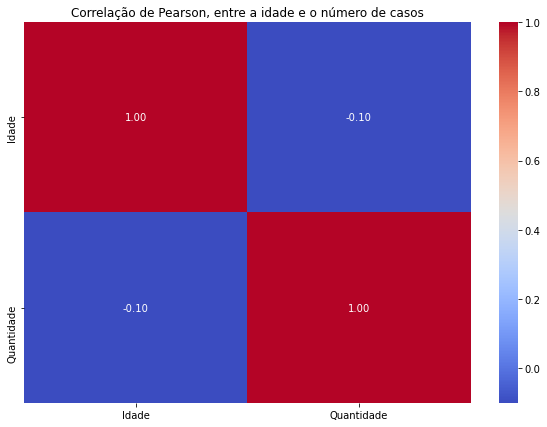

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/userddssilva/Analise-COVID19-PP1-RNA2020.1/master/dataset/dataset_limpo_covid19_manaus.csv?token=AKCAQ6VZQPYTK4ZNCJ7X3DC7HKNFW")
dataframe = pd.DataFrame([[col1, col2] for col1, col2 in zip(df['idade'].values, df['idade'].value_counts())], columns=['Idade', 'Quantidade'])

#method correlation default pearson
plt.figure(figsize=(10, 7)), sns.heatmap(dataframe.corr(), annot = True, fmt = '.2f', cmap='coolwarm')
plt.title('Correlação de Pearson, entre a idade e o número de casos')
plt.show()